In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj

In [2]:
# # gw50m
altitude = 50
answer_location = (52.53962045830213, 13.419884901364885, 50)
source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
rssi = np.array([-73.54774707124031, -67.2598116355535, -65.27220428570674, -74.73454353002585, -68.84323573826707, -70.71299630957999, -69.14659573310989, -69.70525715798875, -74.09346777134436, -63.18224654815296])
d = []
# rssi to distance with curve fit
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)

# gw100m
# altitude = 100
# answer_location = (52.53962045830213, 13.419884901364885, 100)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.94630524200359, -67.04524365136507, -65.51133843649966, -71.99102431036357, -69.38046352414914, -70.69053819851595, -69.09353142802274, -69.9814290434943, -71.63403554811134, -63.81425676768592])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

# # gw100m_nobuilding
# altitude = 100
# answer_location = (52.53962045830213, 13.419884901364885, 200)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.58976692127023, -66.84978429622258, -65.43775615882458, -68.51723739248007, -69.34638664552159, -70.67158737502467, -69.47921756875596, -69.74188545126589, -71.33057463016215, -63.86118311152556])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

[489.3588074217971, 240.65689095825144, 192.2947928449276, 559.5039227350577, 287.7506871248685, 355.36152157821056, 297.7740251687397, 317.15525160163276, 520.4489797985229, 151.88665572438723]


In [3]:
[490.9845858372635, 239.1658724664293, 197.06693373599455, 269.9714723370692, 299.17153956786615, 352.6494853812043, 303.1263591036511, 324.5792879614826, 385.8966341254787, 162.56495453832926]

[490.9845858372635,
 239.1658724664293,
 197.06693373599455,
 269.9714723370692,
 299.17153956786615,
 352.6494853812043,
 303.1263591036511,
 324.5792879614826,
 385.8966341254787,
 162.56495453832926]

Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
Number of large errors: 10
N

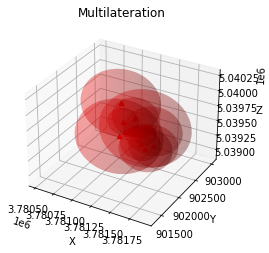

481.20688407210787


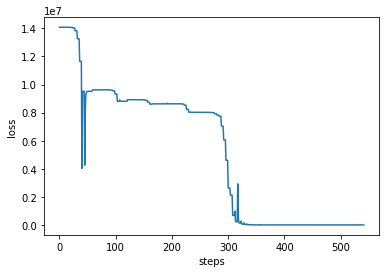

In [4]:
# multilateration program

errors_array = []
loss_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# # Convert GPS coordinates to Cartesian coordinates
def to_cartesian_2d(lat, lon):
    # Calculate UTM zone from longitude
    zone = int((lon + 180) / 6) + 1
    # Determine if the point is in the Northern or Southern hemisphere
    hemisphere = 'north' if lat >= 0 else 'south'

    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

    x, y = transformer.transform(lat, lon)
    return x, y

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

# Objective function to minimize the sum of squared errors between estimated and actual distances
delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    large_errors = np.abs(errors) >= delta
    print('Number of large errors:', np.sum(large_errors))
    loss_array.append(np.sum(huber_loss(errors)))
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Constraint function to ensure the estimated location has the same altitude as the wanted location
def altitude_constraint(xyz_receiver_estimated, altitude):
    lat, lon, alt = to_gps(*xyz_receiver_estimated)
    x, y, z = to_cartesian(lat, lon, altitude)
    return xyz_receiver_estimated[2] - z

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

# Starting GPS coordinates of the receiver (can be anywhere)
receiver_location = (40.048174, 10.134445, 0)

# Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
xyz_receiver = np.array(to_cartesian(*receiver_location))

# Perform multilateration to estimate the location of the receiver
result = minimize(error, xyz_receiver, args=(xyz_sources, d), constraints=[{'type': 'eq', 'fun': altitude_constraint, 'args': (altitude,)}])
xyz_receiver_estimated = result.x

# Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
receiver_location_estimated = to_gps(*xyz_receiver_estimated)

print('Receiver location:', receiver_location_estimated)
print('error to the truth in 3d', np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
print('error to the truth in 2d', np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))


# Plot the sources and the estimated location of the receiver
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the sources
for i in range(len(source_locations)):
    x, y, z = to_cartesian(*source_locations[i])
    ax.scatter(x, y, z, color='r', marker='^')

# Plot the estimated location of the receiver
x, y, z = to_cartesian(*receiver_location_estimated)
ax.scatter(x, y, z, color='b', marker='o')

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Multilateration')

print(source_locations)
# Plot circles (or spheres) representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle (or sphere) in meters
    radius = d[i]
    # Get the Cartesian coordinates of the source
    x, y, z = to_cartesian(*source_locations[i])
    # Create a grid of points on the surface of the sphere
    # Sphere in 3D
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    X = x + radius*np.outer(np.cos(u), np.sin(v))
    Y = y + radius*np.outer(np.sin(u), np.sin(v))
    Z = z + radius*np.outer(np.ones_like(u), np.cos(v))
    ax.plot_surface(X, Y, Z, color='r', alpha=0.2)

plt.show()

# create a figure for error
fig = plt.figure()

plt.plot(loss_array)
plt.xlabel("steps")
plt.ylabel("loss")
print(loss_array[-1])

# show the plot
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

# Plot the estimated location of the receiver
folium.Marker(location=receiver_location_estimated[:2], icon=folium.Icon(color='purple')).add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



In [5]:
# create every pattern of 4 or more beacons
import itertools

source_locations_iter = []
d_iter = []
for n in range(4,len(source_locations)+1):
	for source_location in itertools.combinations(source_locations, n):
	    source_locations_iter.append(list(source_location))
	    
for n in range(4,len(d)+1):
	for d_i in itertools.combinations(d, n):
	    d_iter.append(list(d_i))
print(source_locations_iter)
print(d_iter)

[[(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.54022829654233, 13.424028618727982, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53768690920158, 13.423827698593255, 19)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53701243697258, 13.41926365424317, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53765506974833, 13.416535624425991, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715

100%|██████████| 848/848 [48:08<00:00,  3.41s/it] 

[[47.599844413820826, 200.48121662461057, 4, 45.85110325415672, 5.815992620405557, 188.50517676594097], [3.714950557162858, 10.836790655842515, 4, 5.577699665621606, 200.42775763763626, 13.585143686691918], [7.610659413265026, 10.100498449024144, 4, 7.318563405585582, 10.833898530315707, 28.86535482945656], [5.42162904488066, 21.76868176513364, 4, 5.069916474562309, 10.097803110921909, 19.870998277578288], [3.612866795040077, 13.825417763379178, 4, 3.864373464228229, 21.76287196671415, 13.072148270183797], [112651.70006721068, 112886.30245366065, 4, 146.6715556192002, 13.821728022604644, 450604.8002688427], [1102698.1627427936, 1102882.10582171, 4, 175.8288406937182, 112849.63087215151, 4410790.650971174], [181.0491704565407, 483.64905303136, 4, 183.12172039209085, 751010.6761082533, 722.8005528188312], [74.48068783894587, 90.54910642836732, 4, 89.7736109990872, 483.51969813570713, 296.77729517374445], [71.16121855188409, 92.78801784214494, 4, 88.70520101392998, 90.52494803544255, 283.

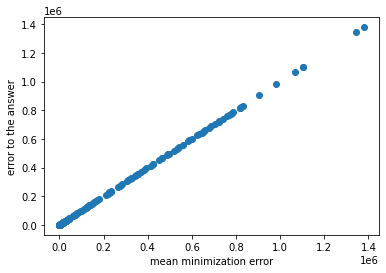

In [6]:
# multilateration with every patterns
from tqdm import tqdm

errors_array = []
loss_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

# Objective function to minimize the sum of squared errors between estimated and actual distances
delta = 1  # Huber parameter, can be tuned

def huber_loss(errors):
    return np.where(np.abs(errors) < delta, 0.5 * errors**2, delta * (np.abs(errors) - 0.5 * delta))

def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    large_errors = np.abs(errors) >= delta
    # print('Number of large errors:', np.sum(large_errors))
    loss_array.append(np.sum(huber_loss(errors)))
    errors_array.append(np.sqrt(errors**2))
    return np.sum(huber_loss(errors))

# Constraint function to ensure the estimated location has the same altitude as the wanted location
def altitude_constraint(xyz_receiver_estimated, altitude):
    lat, lon, alt = to_gps(*xyz_receiver_estimated)
    x, y, z = to_cartesian(lat, lon, altitude)
    return xyz_receiver_estimated[2] - z

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

xyz_receiver_estimated_list = []
receiver_locations_estimated = []
error_answer_minimization = []

for i in tqdm(range(len(d_iter))):

    source_locations = source_locations_iter[i]
    distance = d_iter[i]

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (40.048174, 10.134445, 0)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, distance), constraints=[{'type': 'eq', 'fun': altitude_constraint, 'args': (altitude,)}])
    xyz_receiver_estimated = result.x
    xyz_receiver_estimated_list.append(xyz_receiver_estimated)

    error_answer = np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated)
    error_answer_2d = np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2])))
    error_answer_minimization.append([np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d, loss_array[-1]])
    
    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)
    receiver_locations_estimated.append(receiver_location_estimated)

    # print('Receiver location:', xyz_receiver_estimated)
    # print('Receiver location:', receiver_location_estimated)
    # print('error', np.sum(errors_array[-1]))

print(error_answer_minimization)
error_answer_minimization.sort(key=lambda item: item[0])
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error")
plt.ylabel("error to the answer")
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

for i in range(len(receiver_locations_estimated)):
# Plot the estimated location of the receiver
    folium.Marker(location=receiver_locations_estimated[i][:2], icon=folium.Icon(color='purple'), tooltip=f'Point {i}').add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



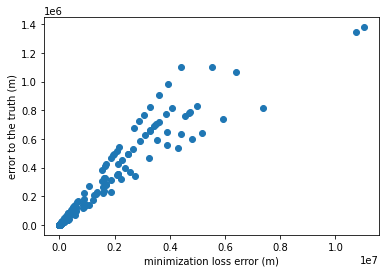

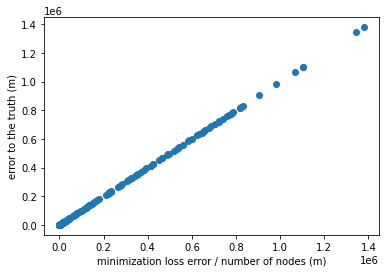

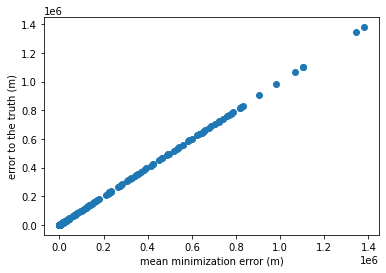

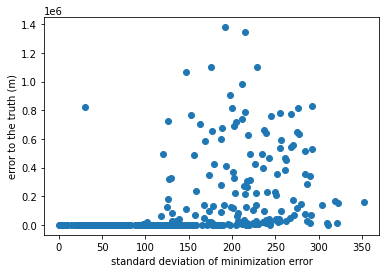

[]
[[10.006598182662971, 7.3433324210144635, 10.606660986557522, 10.323588065965335, 9.878839874088609, 2.943007482530429, 6.3517357204445135, 6.824721019920539, 5.680032587066837, 6.248266087823968, 9.950786860850405, 10.33922601655371, 4.84045495469108, 3.605153036776797, 15.816553816767351, 8.18073534190552, 9.762464143929868, 5.7559202957991, 12.636566169950742, 11.123127118019688, 13.825417763379178, 10.836790655842515, 7.3512625696770515, 11.428809365891867, 5.54348032631283, 3.345827909970067, 7.415879208570491, 4.287444618291471, 6.343226162281283, 6.981869070443425, 10.242875045329212, 10.108882597815953, 7.275326407369065, 21.662205449470942, 9.268251857732988, 7.922539152843791, 10.223822241719423, 9.439598188005458, 8.880763621457309, 21.76868176513364, 3.656275653002561, 8.180328601009323, 3.2056434430737535, 12.14212479122343, 7.245866181214025, 5.441446829952301, 15.383345701547569, 12.458078788323634, 8.796562733662496, 10.100498449024144, 4.6301776625032245, 156.875853

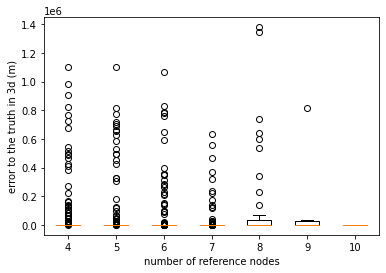

[]
[[9.609582390432925, 146.7677557447226, 9.7598587383163, 775968.551802057, 530805.1672060178, 484.7393095728181, 147.19439609023595, 3.5047800842920935, 6.407375378602028, 3.8725927782514282, 8.150045749941945, 9.94813146776783, 12.138884751278017, 15.812332711458865, 117.81676444211293, 141.31769081458992, 8.87839352472862, 22958.744839777457, 8.178145516193815, 315092.22680846293, 21.76287196671415, 200.42775763763626, 53.172748002686006, 11.120158968428424, 272803.1160029595, 14.14470322488855, 163.09940221010766, 9.437079197165009, 119.02023925019338, 438.64077167608013, 347670.1970971512, 128858.00595546869, 195.58101162758777, 12.454753954706824, 12.802877187315797, 13.34219452201449, 7.413900061730278, 17.596099577962242, 23.33396903296967, 10.097803110921909, 3.204787928895581, 15.379240218225691, 496.02970679921566, 10.464131164125813, 23.397574188107424, 52.9642684461544, 195.4695084685605, 251793.4659176042, 144201.17447183555, 10.833898530315707, 90.75926793045454, 1398.

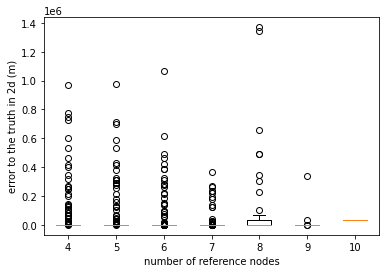

[]
[[9.609582390432925, 146.7677557447226, 9.7598587383163, 775968.551802057, 530805.1672060178, 484.7393095728181, 147.19439609023595, 3.5047800842920935, 6.407375378602028, 3.8725927782514282, 8.150045749941945, 9.94813146776783, 12.138884751278017, 15.812332711458865, 117.81676444211293, 141.31769081458992, 8.87839352472862, 22958.744839777457, 8.178145516193815, 315092.22680846293, 21.76287196671415, 200.42775763763626, 53.172748002686006, 11.120158968428424, 272803.1160029595, 14.14470322488855, 163.09940221010766, 9.437079197165009, 119.02023925019338, 438.64077167608013, 347670.1970971512, 128858.00595546869, 195.58101162758777, 12.454753954706824, 12.802877187315797, 13.34219452201449, 7.413900061730278, 17.596099577962242, 23.33396903296967, 10.097803110921909, 3.204787928895581, 15.379240218225691, 496.02970679921566, 10.464131164125813, 23.397574188107424, 52.9642684461544, 195.4695084685605, 251793.4659176042, 144201.17447183555, 10.833898530315707, 90.75926793045454, 1398.

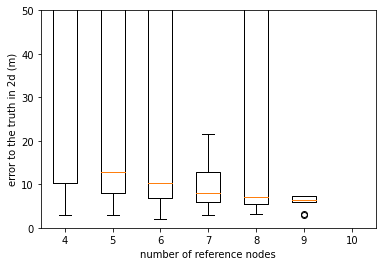

[]
[[0.7599495045150348, 0.9760052783094864, 1.085783034504118, 1.193419072090279, 1.6356670627937149, 2.2215707876690516, 2.3855156564205515, 2.5945521717729605, 2.755438000212564, 2.780553160348532, 2.91487597384679, 2.9393483489808148, 2.997407709966673, 3.086552092934866, 3.1018575371251487, 3.10636009624546, 3.3158938635561768, 3.54523655728277, 3.5753721891084425, 3.590362117873795, 3.612866795040077, 3.714950557162858, 3.878009112504188, 3.88359938844782, 4.006012696597345, 4.162321186788809, 4.1803913213011725, 4.196736839385551, 4.1976650137977884, 4.203376915896179, 4.267016264014224, 4.405600650685031, 4.406864826007677, 4.434522984602403, 4.445796708987508, 4.518189018172656, 4.549409827120591, 4.97033519142704, 5.243767394406099, 5.42162904488066, 5.45768174955127, 5.471571656156321, 5.64504301370917, 5.8754357192886815, 6.030531121494192, 6.683953431671476, 7.129176815334922, 7.49475023799571, 7.552415493304991, 7.610659413265026, 7.631003285962521, 8.43954090163254, 17.1

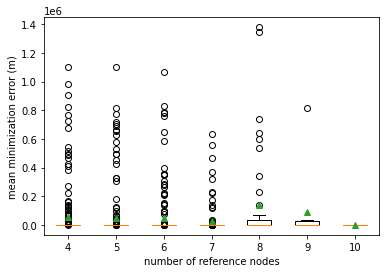

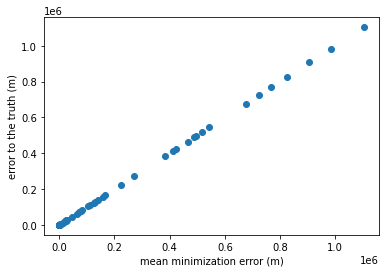

In [7]:
# visualization of multilateration with every pattern
# the relation between error to the truth and mean minimization error, number of reference nodes
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[5] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("minimization loss error (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[5]/item[2] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("minimization loss error / number of nodes (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("standard deviation of minimization error")
plt.ylabel("error to the truth (m)")

#find line of best fit
# a, b = np.polyfit([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][1])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 3d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.ylim(0, 50)
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][0])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7], showmeans=True)
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("mean minimization error (m)")
plt.show()


error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization if item[2]==4], [item[1] for item in error_answer_minimization if item[2]==4])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")  
plt.show()

(array([721.,  14.,   9.,   5.,   3.,   5.,   2.,   3.,   4.,   4.,   5.,
          1.,   2.,   1.,   0.,   2.,   5.,   0.,   0.,   2.,   2.,   0.,
          2.,   3.,   1.,   3.,   1.,   1.,   1.,   0.,   3.,   0.,   1.,
          2.,   0.,   4.,   0.,   1.,   1.,   2.,   1.,   0.,   2.,   1.,
          0.,   2.,   1.,   3.,   0.,   2.,   1.,   0.,   2.,   1.,   0.,
          2.,   2.,   1.,   0.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([1.96618619e+00, 1.37923937e+04, 2.75828212e+04, 4.13732487e+04,
        5.51636762e+04, 6.89541037e+04, 8.27445312e+04, 9.65349587e+04,
        1.10325386e+05, 1.24115814e+05, 1.37906241e+05, 1.51696669e+05,
        1.65487096e+05, 1.79277524e+05, 1.93067951e+05, 2.06858379e+05,
        2.20648806e+05, 2.3443

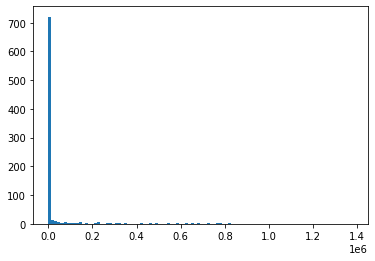

In [8]:
plt.hist([item[1] for item in error_answer_minimization], bins=100)

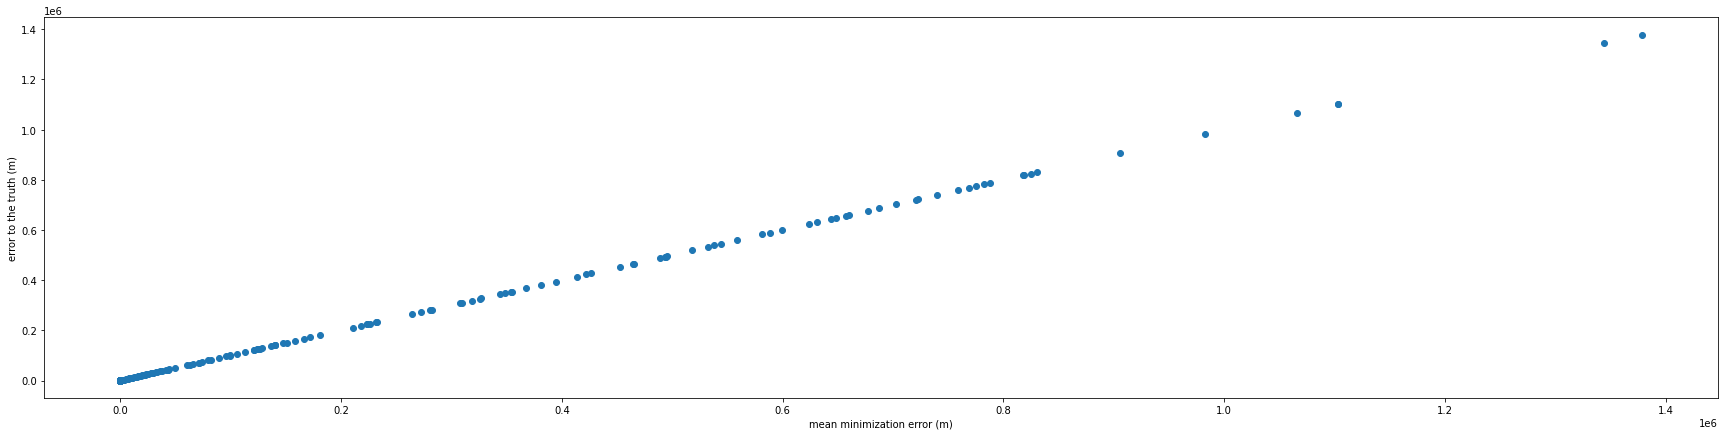

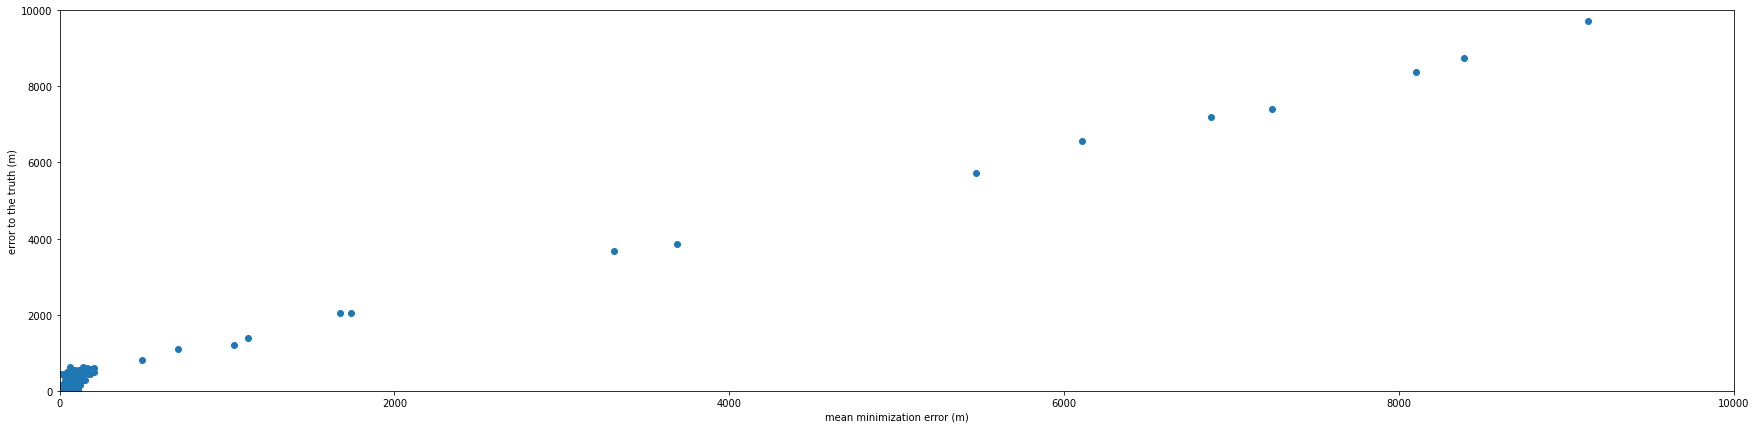

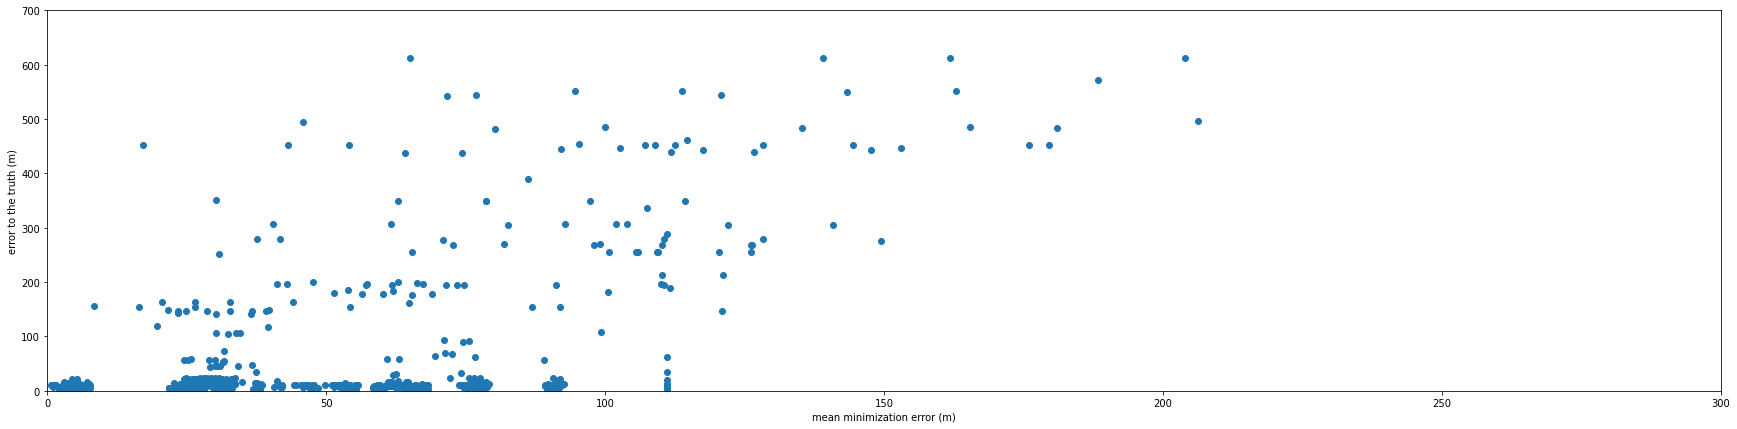

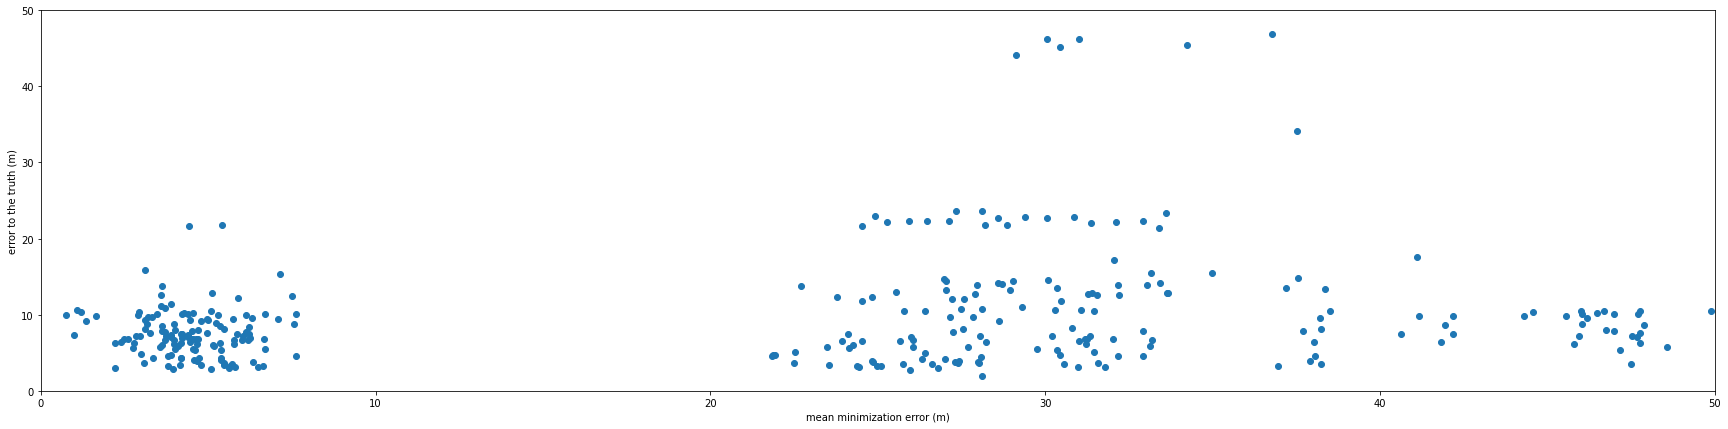

In [9]:
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.show()
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(figsize=(30,7),facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)") # error between the measured distance and estimated distance
plt.ylabel("error to the truth (m)")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()

In [10]:
# [np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d]
for i in range(len(error_answer_minimization)):
    if error_answer_minimization[i][2] == 9:
        print(error_answer_minimization[i])

[52.42903718228552, 6.836601150997975, 9, 97.29909649704422, 6.182087960114041, 468.14577787996075]
[52.48450618833608, 6.183738188975747, 9, 97.44554116072746, 33404.19617050626, 468.601705774623]
[53.269173658404625, 7.348799388810321, 9, 96.85040369298375, 2.9610171908032368, 475.5628453327996]
[53.32196384800601, 2.961807628957301, 9, 97.67052401839774, 6.096391739681981, 475.5125994265916]
[53.84917897259113, 3.27805545210956, 9, 97.30232159428895, 5.8653760437513425, 480.3893602167966]
[53.86452846529645, 6.098019094712799, 9, 96.80711041048775, 6.466015729182749, 480.9271146408483]
[53.886961525409674, 6.467741713880308, 9, 96.68063411683377, 337117.86536535365, 481.0653684333209]
[32175.711294217428, 32451.692849335897, 9, 251.02345409969251, 6.834776742046937, 289576.90164795687]
[33075.56497873863, 33412.477131290565, 9, 213.572497948702, 7.346838303938116, 297675.58480864763]
[818323.592355372, 818586.1570852885, 9, 199.57421288848312, 3.277180626776256, 7364907.831198349]
